### total 12,447개

미국 - 1042개(뉴스)  
미국 - 1094개(블로그)  

여행 - 991개(뉴스)  
여행 - 1098개(블로그)  

네이버 - 815개(뉴스)  
네이버 - 1944개(블로그)  

네이버블로그 - 453개(뉴스)  
네이버블로그 - 975개(블로그)  

네이버쇼핑 - 300개(뉴스)  
네이버쇼핑 - 1000개(블로그)  

네이버지도 - 508개(뉴스)  
네이버지도 - 924개(블로그)  

네이버클라우드 - 376개(뉴스)  
네이버클라우드 - 927개(블로그)  

***import***

In [1]:
import pandas as pd
import pykospacing
spacer = pykospacing.Spacing()
from konlpy.tag import Okt
okt = Okt()
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

**데이터 불러오기**

In [2]:
TRIP_news = pd.read_csv('여행(뉴스)-991row.csv')
TRIP_blog = pd.read_csv('여행(블로그)-1098row.csv')

In [3]:
TRIP_news

,title,link,description
0,"'팬데믹 끝나니 급증'…1분기 여행수지 적자, 3년반 만에 최대",https://n.news.naver.com/mnews/article/001/001...,\n\n'일반 여행객' 관광수지 적자가 원인…1분기 해외관광객 1천100% 증가중국...
1,코로나로 닫힌 국경 열었더니…여행수지 적자 3년 만에 최대,https://n.news.naver.com/mnews/article/015/000...,\n\n\n\n\n\n/사진=연합뉴스코로나19 팬데믹(전염병 세계적 대유행) 기간 ...
2,괌 한국 여행객 3400명 속속 입국…국적기 11편 투입,https://n.news.naver.com/mnews/article/448/000...,\n\n[앵커]초강력 태풍 때문에 괌에서 발이 묶였던 우리 여행객 3400여 ...
3,1분기 498만 명 해외로…여행수지 32억 달러 적자,https://n.news.naver.com/mnews/article/422/000...,\n\n\t\t\t코로나19 사태로 줄었던 여행수지 적자가 다시 확대되고 있습니다....
4,‘태풍 피해’ 괌 여행객 귀국…“하루하루 버텼다”,https://n.news.naver.com/mnews/article/056/001...,\n\n[앵커] 슈퍼 태풍으로 괌 현지에서 발이 묶였던 한국 여행객 천여 명이 귀국...
...,...,...,...
986,DMZ 평화의 길 김포 거점센터 개소식...'도보 여행자 쉼터 역할',https://n.news.naver.com/mnews/article/008/000...,\n\n\n\n\n\n 김포시 DMZ 평화의 길 거점센터 전경./사진=현대곤기자 김...
987,NaN,https://n.news.naver.com/mnews/article/312/000...,\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t[텐아시아=신지원 기자] \n...
988,[김민성의 시네마 디스패치] 지역과 여행 섹션: 완벽한 애틀랜타의 하루,https://n.news.naver.com/mnews/article/140/000...,"\n\n\n\n\n\n영화가 우리를 가끔 어딘가로 이끄는 도구라면, 잡지는 종종 그..."
989,"통계청, 여행 등 서비스 소비 급증…가전·컴퓨터 수요 감소",https://n.news.naver.com/mnews/article/056/001...,"\n\n통계청이 오늘(1일) 발표한 '4월 온라인쇼핑동향'을 보면, 4월 온라인쇼핑..."


**본문 합치기**

In [4]:
df_news = TRIP_news['description'].astype(str).str.cat(sep=' ')

In [5]:
df_blog = TRIP_blog['description'].astype(str).str.cat(sep=' ')

In [6]:
df_news

'\n\n\'일반 여행객\' 관광수지 적자가 원인…1분기 해외관광객 1천100% 증가중국인 방한 관광객은 본격 회복 안돼…"관광산업 경쟁력 확보 대책 필요"\n\n\n\n연휴 앞두고 붐비는 공항(영종도=연합뉴스) 윤동진 기자 = 어린이날 연휴를 하루 앞둔 지난 5월 4일 오전 인천국제공항 1터미널 면세구역이 붐비고 있다. 2023.5.4 mon@yna.co.kr    (서울=연합뉴스) 박대한 기자 = 코로나19 팬데믹(세계적 대유행) 기간 줄었던 여행수지 적자 규모가 다시 확대되고 있다.    코로나19 기간 닫혔던 국경 문이 열리면서 일반 여행자들에 의한 관광수지 적자가 불어나고 있기 때문이다.    30일 한국은행에 따르면 올해 1분기 여행수입은 30억8천600만달러, 여행지급은 63억2천100만달러로 여행수지 적자액은 32억3천500만달러로 집계됐다.    이런 적자 규모는 2019년 3분기 32억8천만달러 이후 3년 반 만에 가장 큰 것이다.    1분기 기준으로는 2018년 1분기(-53억1천400만달러) 이후 5년 만에 최대다.    분기별 여행수지 적자 규모는 2019년 4분기 29억3천400만달러에서 코로나19 충격이 발생한 2020년 1분기 19억9천만달러, 2분기 9억2천500만달러로 급감했다.    세계 각국이 국경 문을 닫으면서 필수 이동을 제외하면 여행 등이 사실상 중단됐기 때문이다.     이어 2020년 3분기 12억5천200만달러, 4분기 16억4천900만달러에 이어 2021∼2022년에는 분기별로 2천만달러 전후의 적자를 기록했지만, 올해 1분기 3천만달러 이상으로 불어났다.    여행수지 적자가 급증한 것은 유학·연수 수지보다 관광수지가 큰 영향을 미쳤다.    관광수지는 여행수지에서 유학이나 연수 등을 뺀 일반 여행자들에 의해 발생하는 서비스 수지다.    유학·연수 수지 적자 규모는 지난해 4분기 6억1천800만달러에서 올해 1분기 6억5천만달러로 5.2% 증가에 그쳤지만, 관광수지 적자는 같은 기간 17억6천100만달러에서

### 전처리 함수 
*6주차 01.WordCloud 실습코드 참고*

- <span style = 'font-size:1.1em;line-height:1.5em'>(1) 줄바꿈 문자 제거</span>
- <span style = 'font-size:1.1em;line-height:1.5em'>(2) 오탈자 교정 (생략)</span>
- <span style = 'font-size:1.1em;line-height:1.5em'>(3) 띄어쓰기 교정</span>
- <span style = 'font-size:1.1em;line-height:1.5em'>(4) sentence tokenization (너무 오래걸려서 생략)</span>
- <span style = 'font-size:1.1em;line-height:1.5em'>(5) 특수문자 문자 제거</span>
- <span style = 'font-size:1.1em;line-height:1.5em'>(6) word tokenization (형태소 분석 및 stemming)</span>
- <span style = 'font-size:1.1em;line-height:1.5em'>(7) stopword removal</span>

**불용어 목록 생성**

In [7]:
with open('stopwords.txt', 'r', encoding='utf-8') as f:
    stopwords = f.readlines()
stopwords = [x.replace('\n','') for x in stopwords] # stopword 파일의 줄바꿈 문자 제거

In [8]:
def preprocessing(x):
    p = re.compile('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]')
    results = []
    result = []
    x = x.replace('\n',' ') # (1) 줄바꿈 문자 제거
    df_news = spacer(x) # (3) 띄어쓰기 교정
    
    tokens = okt.morphs(x, stem=True) # (6) word tokenization
    for token in tokens:
        token = p.sub('', token) # (5) 특수문자 제거
        if token not in stopwords:
            result.append(token) # (7) stopword removal
    results.extend(result)
    results = ' '.join(results)
    return results

### pos_taging 함수

#(1) 품사 태깅 수행 

#(2) 명사, 형용사, 부사에 해당하는 단어들만 추출하여 저장

#(3) 빈도가 가장 높은 단어는 주로 주제로 검색한 단어이기에 의미있는 결과를 위해 제거

In [9]:
def pos_taging(x):
    pos_news = okt.pos(x) # (1)
    filtered_result = [word for word, pos in pos_news if pos in ['Noun', 'Adjective', 'Adverb']] # (2)
    nouns_news = [n for n in filtered_result if len(n) > 1]
    count = Counter(nouns_news) # 각 단어의 출현 빈도를 계산
    tags = count.most_common(100) # 가장 빈도가 높은 단어 100개 추출
    tags = tags[1:] # (3)
    return tags

**전처리 및 postag 진행**

In [10]:
news = preprocessing(df_news)
news = pos_taging(news)

In [11]:
blog = preprocessing(df_blog)
blog = pos_taging(blog)
blog = [word for word in blog if not word[0].endswith('다')] # !~다로 끝나는 경우 제거

## Wordcloud 생성

In [12]:
# wordcloud에서 한글을 사용할 수 있도록 설정하기
font_path = 'C:\\Users\\user\\anaconda3\\envs\\text\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\malgun.ttf'

***news***

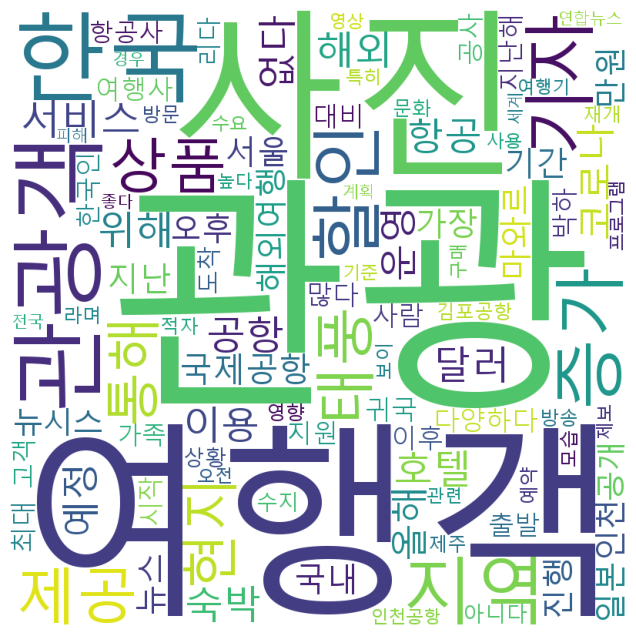

In [20]:
wc = WordCloud(font_path=font_path, 
               background_color='white', 
               width=800, height=800)
cloud = wc.generate_from_frequencies(dict(news)) # (1)

plt.figure(figsize=(8,8))
plt.axis('off') # 축을 비활성화하여 표시되는 축 라벨과 눈금을 제거
plt.imshow(cloud)

***blog***

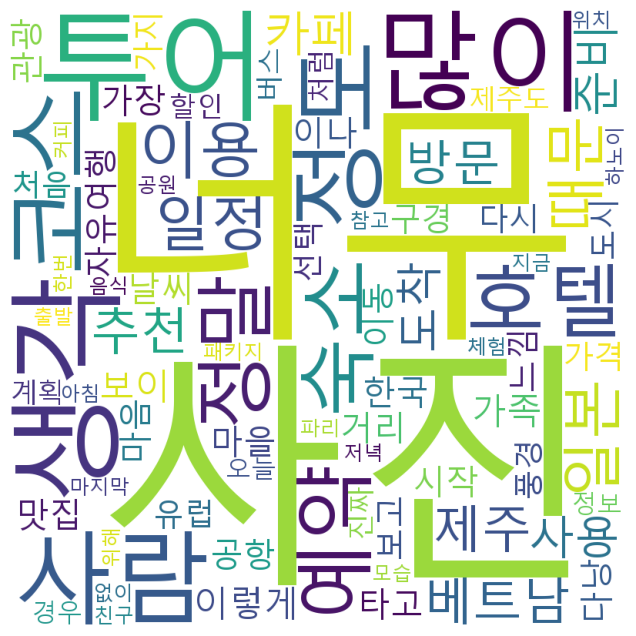

In [21]:
wc = WordCloud(font_path=font_path, 
               background_color='white', 
               width=800, height=800)
cloud = wc.generate_from_frequencies(dict(blog)) # (1)
 
plt.figure(figsize=(8,8))
plt.axis('off') # 축을 비활성화하여 표시되는 축 라벨과 눈금을 제거
plt.imshow(cloud)